In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TCanvas, TLegend, gROOT, TFile, gPad, TPad, TF1, gStyle, TGraphErrors
import sys
from array import array                                                                                                                                                            
import numpy as np
import math
gROOT.SetStyle("Plain")
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TBinomialEfficiencyFitter::result>:  chi2 3.184077 ndf 0 


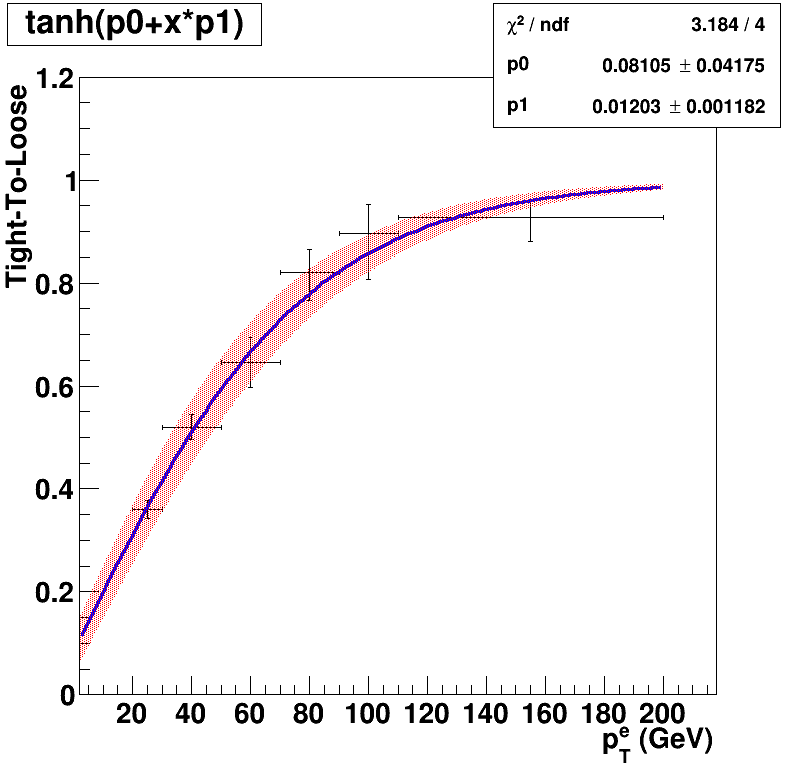

In [3]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('FakeRate2016/frElePt.root')
h = fi.Get('fakerate')
h.Draw()
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("tanh(p0+x*p1); p_{T}^{e} (GeV); Tight-To-Loose")
graph.GetYaxis().SetTitleOffset(1.2)
graph.SetMinimum(0.0)
graph.SetMaximum(1.2)
gPad.Update()
f = TF1("Complex law","tanh([0]+x*[1])", 0, 200)
f.SetParameters(0, 0)
f.SetLineColor(4)
f.SetLineStyle(0)
fitResult = h.Fit(f, "S")
steps = 500
x = np.linspace(0.0, 200.0, num=steps)                                                                                                                                    
y = np.array([math.tanh(fitResult.GetParams()[0] + fitResult.GetParams()[1]*x[i]) for i in range(steps)])                                                                             
ynew = np.array([math.tanh((fitResult.GetParams()[0]+fitResult.GetErrors()[0]) + (fitResult.GetParams()[1]+fitResult.GetErrors()[1])*x[i]) for i in range(steps)])                                                                            
ey = ynew - y
zeros = np.zeros(graph.GetN())                                                                                                                                             
interval = TGraphErrors(steps, x, y, zeros, ey)                                                                                                                            
interval.SetFillColor(2)                                                                                                                                                   
interval.SetFillStyle(3002)                                                                                                                                                
interval.Draw("e3 same")
canvas.Draw()

In [3]:
f = TFile("FRMME.root", "Recreate")
fitResult.Write("EleFR")
f.Close()